In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


ModuleNotFoundError: No module named 'ephem'

In [5]:
df1 = pd.read_excel(
     os.path.join(APP_PATH, "Data","fruitdata.xlsx"),
     engine='openpyxl',
)


# df=pd.read_excel("fruitdata.xlsx")
# df.info()

NameError: name 'APP_PATH' is not defined

In [6]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [7]:
df['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [8]:
import seaborn as sns

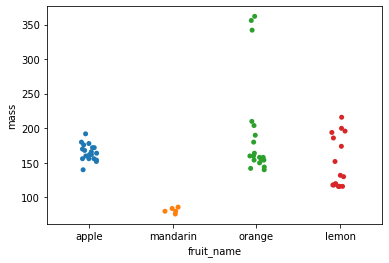

In [10]:
sns.stripplot(x='fruit_name', y='mass', data=df );

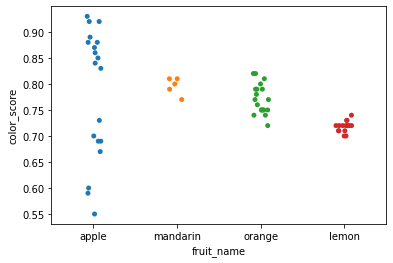

In [14]:
sns.stripplot(x='fruit_name', y='color_score', data=df );

In [16]:
df.isna().sum()

fruit_label    0
fruit_name     0
mass           0
width          0
height         0
color_score    0
dtype: int64

In [29]:
X = df.iloc[:,3:].values
y = df.iloc[:,0].values
print(X.shape, y.shape)

(59, 3) (59,)


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                   random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(47, 3) (12, 3) (47,) (12,)


In [34]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_)
print(model.score(X_test,y_test))

[0.3171259  0.30605288 0.37682122]
0.9166666666666666


In [35]:
from sklearn.svm import SVC

In [38]:
k = ['linear', 'poly', 'rbf', 'sigmoid']
for i in k:
    model = SVC(kernel=i)
    model.fit(X_train,y_train)
    print("for kernel ", i, "accuracy is ", model.score(X_test,y_test))

for kernel  linear accuracy is  0.9166666666666666
for kernel  poly accuracy is  0.9166666666666666
for kernel  rbf accuracy is  1.0
for kernel  sigmoid accuracy is  0.5833333333333334
